## 🛡️The Sparks Foundation - GRIP - Data Science and Business Analytics - NOV'2021🛡️
## ⚜️Task-1 : Prediction using Supervised ML⚜️           
### 🔸Author : Abhisek Barik🔸
### 🔹Dataset used: Student Details (Hours and Scores)🔹
* It can be downloaded through the following link - http://bit.ly/w-data


### ⛔Problem Statements⛔ 
 * Predict the percentage of a student based on the no. of study hours. 
 * What will be predicted score if a student studies for 9.25 hrs / day? 

In [1]:
# Importing all the necessary libraries to work on the dataset
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Reading data from csv dataset as a pandas dataframe
student_details = pd.read_csv('student_details.csv')
print("Student's details imported successfully")

# Prints top 5 rows 
student_details.head() 

Student's details imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### 💠Observation: Hours & Scores' values of the student are displayed💠 

In [3]:
# Displays number of rows & columns
student_details.shape

(25, 2)

###### 💠Observation: There are 25 rows and 2 columns💠 

In [4]:
# Displays a concise summary of the dataframe
student_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### 💠Observation: There are 25 entries ranging from 0 to 24. It also shows that there are no null values in each column. Talking about datatype, Hours are in float & Scores are in integer💠 

In [5]:
# Shows some basic statistical details of a dataframe of numeric values.
student_details.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### 💠Observation: Details (Hours & Scores) like count, mean, std, min, 25 percentile, 50 percentile, 75 percentile and max are shown💠 

### 📌So now we'll move to "VISUALIZATION OF DATA" to understand what kind of data we have. 
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

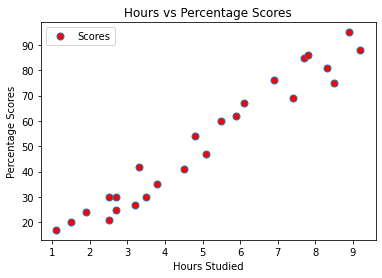

In [6]:
# Plotting the distribution of scores
student_details.plot(x='Hours', y='Scores', style='o', markerfacecolor='red', markersize='7')  
plt.title('Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scores')  
plt.show()

###### 💠Observation: From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score💠

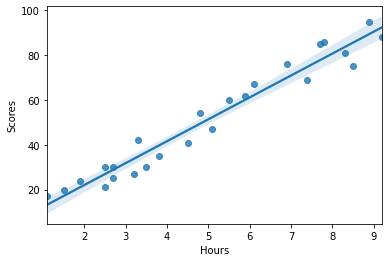

In [7]:
# Plotting the regression plot as it will give us a better and clear visualization of data by drawing a linear line
sns.regplot(x=student_details['Hours'], y=student_details['Scores']);  

### 📌Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = student_details[['Hours']]
y = student_details['Scores']

### 📌Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using "Scikit-Learn's built-in train_test_split()" method

In [9]:
from sklearn.model_selection import train_test_split  
# Selects randomly the train and test size based on the ratio given (an integer value)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 📌Model Building & then Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression

# Initialising regressor
regressor = LinearRegression()  

# Training the model
regressor.fit(train_X, train_y)   
print("Training has been completed.")

Training has been completed.


In [11]:
# Prediction
pred_y = regressor.predict(val_X) 

# View actual and predicted on test set side by side
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


###### 💠Observation: There's a little bit of difference / error between Actual & Predicted values because it slowly decreases as we feed data to the model, by making minor changes in training & test and other factors that control the model💠

### 📌Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

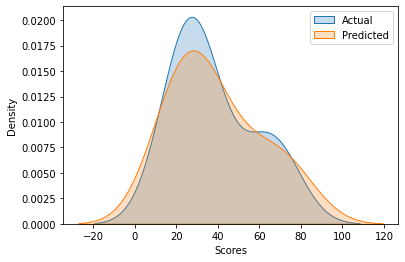

In [12]:
## Actual vs Predicted distribution plot (by means of Kernel Density Estimate)
sns.kdeplot(data=val_y, label="Actual", shade=True);
sns.kdeplot(data=pred_y, label="Predicted", shade=True);  
plt.legend()

###### 💠Observation: Predicted values (orange) are not exactly like the Actual values (blue) but more or less have same distribution so we can't really quantify the amount of error this model may give us with respect to actual values💠

### 📌Checking the Train & Test accuracy by using "regressor.score" function

In [13]:
print('Train accuracy:', regressor.score(train_X, train_y),'\nTest accuracy :', regressor.score(val_X, val_y))

Train accuracy: 0.9484509249326872 
Test accuracy : 0.9367661043365055


###### 💠Observation: Train & Test accuracy are pretty close to each other so we can say that the model is working fine💠

### 📌What will be the predicted score if a student studies for 9.25 hrs / day? 

In [14]:
h = [[9.25]]
s = regressor.predict(h)

print('A student who studies', h[0][0] , 'hours is estimated to score', s[0])
print('No of Hours = 9.25')
print('Predicted Score = 93.89272889341655')

A student who studies 9.25 hours is estimated to score 93.89272889341655
No of Hours = 9.25
Predicted Score = 93.89272889341655


### 📌Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [15]:
from sklearn import metrics 
# Finding Mean Absolute Error
print('Mean Absolute Error :', metrics.mean_absolute_error(val_y, pred_y))

# Finding Max Error
print('Max Error           :', metrics.max_error(val_y, pred_y))

# Finding Mean Squared Error
print('Mean Squared Error  :', metrics.mean_squared_error(val_y, pred_y)) 

Mean Absolute Error : 4.130879918502486
Max Error           : 6.745574939513553
Mean Squared Error  : 20.33292367497997
